读取数据

In [105]:
import pickle
import sys
D=1600
W=200
ID=4
def read_data(D,W):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(D)+'_W='+str(W)
    
    with open(name+'_mouse_check.bin','rb') as file:
        check_datas=pickle.load(file)
    with open(name+'_mouse_move.bin','rb') as file:
        move_datas=pickle.load(file)
    with open(name+'_track.bin','rb') as file:
        track_datas=pickle.load(file)
    with open(name+'_information.bin','rb') as file:
        inf=pickle.load(file)
    
    return move_datas,check_datas,track_datas,inf

mouse_move,mouse_check,track,inf=read_data(D,W)

将轨迹数据转换为pd.DataFrame格式

In [106]:
import pandas as pd

Track={}
for i in range(len(track)):
    Track[i]=pd.DataFrame(track[i])
    Track[i].columns=['t','x','y']


计算轨迹数据中的其他相关项

In [107]:
import numpy as np

def setValue(Track):
    '''
    计算速度和时间
    '''
    trace=[]
    for i in range(len(Track)):
        T=Track[i].t.values
        X=Track[i].x.values
        Y=Track[i].y.values
        
        #将时间标准化
        t0=T[0]
        for i in range(len(T)):
            T[i]=T[i]-t0
            
        s=0
        S=[0,]#点在轨迹上的位置
        for i in range(1,len(X)):
            s+=np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)
            S.append(s)
        
        v=[0,]
        alpha=[0,]
        for i in range(1,len(X)):
            v.append(np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)/(T[i]-T[i-1]+1e-20))
            alpha.append(np.arctan((Y[i]-Y[i-1])/(X[i]-X[i-1]+1e-20)))
        
        
        pandasDataSet=[]
        for i in range(len(X)):
            pandasDataSet.append((T[i],X[i],Y[i],S[i],v[i],alpha[i]))
        
        trace.append(pd.DataFrame(pandasDataSet,columns=['t','x','y','s','v','alpha']))
        
    return trace

Track=setValue(Track)


进行拟合并计算拐点

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 7.0, 8.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 14.23606797749979, 14.23606797749979, 15.23606797749979, 15.23606797749979, 16.23606797749979, 16.23606797749979, 18.23606797749979, 19.23606797749979, 19.23606797749979, 20.23606797749979, 20.23606797749979, 22.23606797749979, 23.23606797749979, 25.23606797749979, 27.23606797749979, 28.23606797749979, 29.23606797749979, 29.23606797749979, 31.23606797749979, 33.236067977499786, 35.236067977499786, 36.236067977499786, 37.236067977499786, 39.236067977499

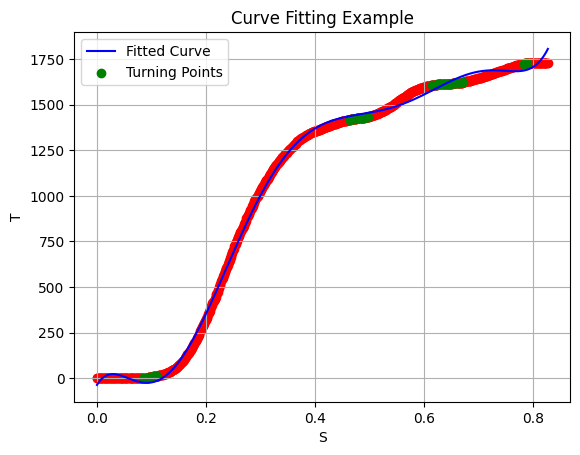

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 8.0, 9.0, 9.0, 10.0, 12.0, 14.0, 14.0, 16.0, 17.0, 19.0, 20.0, 21.0, 23.0, 24.414213562373096, 25.414213562373096, 28.414213562373096, 31.414213562373096, 34.41421356237309, 36.41421356237309, 39.242640687119284, 40.242640687119284, 43.242640687119284, 44.242640687119284, 46.242640687119284, 49.242640687119284, 52.242640687119284, 53.242640687119284, 58.242640687119284, 59.242640687119284, 62.242640687119284, 65.24264068711929, 68.24264068711929, 74.24264068711929, 77.24264068711929, 80.24264068711929, 86.2426406871192

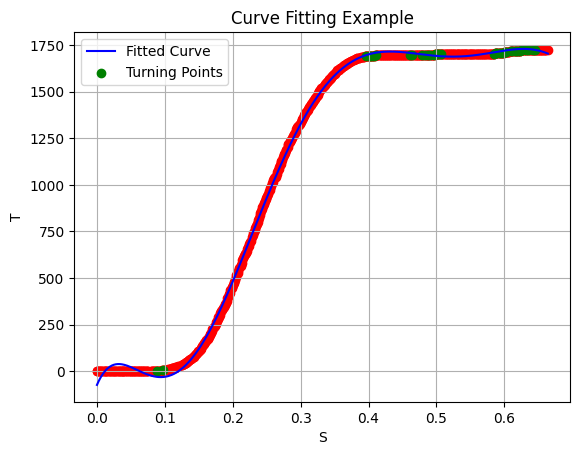

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0, 6.0, 7.0, 8.0, 8.0, 10.0, 11.0, 14.0, 16.0, 18.0, 19.0, 21.82842712474619, 23.82842712474619, 25.82842712474619, 28.82842712474619, 30.242640687119287, 31.242640687119287, 33.24264068711929, 34.24264068711929, 35.24264068711929, 40.34166020071208, 41.34166020071208, 44.34166020071208, 45.34166020071208, 48.34166020071208, 50.34166020071208, 52.34166020071208, 54.34166020071208, 57.34166020071208, 60.34166020071208, 61.34166020071208, 67.66621552104884, 70.66621552104884, 74.66621552104884, 77.66621552104884, 80.66621552104884, 86.66621552104884, 89.66621552104884, 92.66621552104884, 93.6

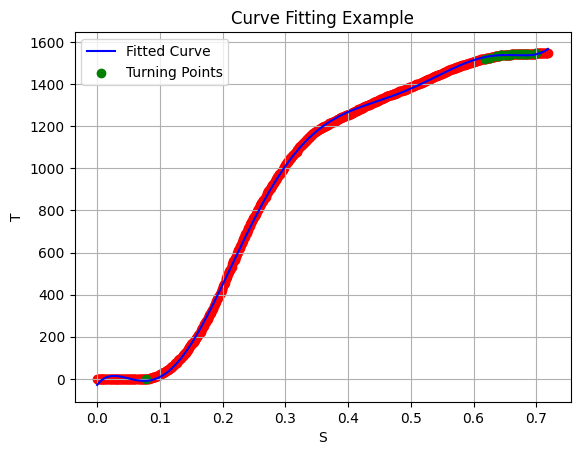

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0, 5.0, 8.0, 9.0, 9.0, 11.0, 14.0, 15.0, 16.0, 22.0, 25.0, 26.0, 27.0, 30.0, 33.0, 36.0, 37.0, 40.0, 42.0, 44.0, 46.0, 50.0, 53.0, 56.0, 59.0, 60.0, 63.0, 67.12310562561765, 70.12310562561765, 73.12310562561765, 79.12310562561765, 84.12310562561765, 87.12310562561765, 90.12310562561765, 93.12310562561765, 96.12310562561765, 99.12310562561765, 102.12310562561765, 107.12310562561765, 111.12310562561765, 116.12310562561765, 119.12310562561765, 124.12310562561765, 127.12310562561765, 132.12310562561765, 137.1231056256176

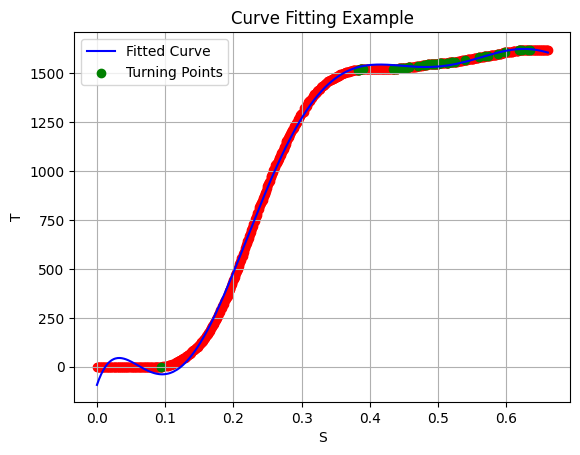

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, 9.0, 10.0, 10.0, 11.0, 11.0, 13.0, 14.0, 14.0, 16.0, 16.0, 17.0, 18.0, 21.0, 22.0, 24.0, 24.0, 25.0, 25.0, 26.0, 28.0, 28.0, 29.0, 31.0, 32.0, 33.0, 33.0, 35.0, 36.0, 39.0, 39.0, 40.0, 41.0, 43.0, 43.0, 44.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 54.0, 56.0, 56.0, 58.0, 59.0, 61.0, 62.0, 63.0, 65.0, 66.0, 67.0, 69.0, 70.0, 73.0, 74.0, 76.0, 78.0, 80.0, 83.0, 84.0, 85.0, 88.0, 90.0, 91.0, 94.0, 95.0, 98.16227766016839, 100.16227766016839, 104.16227766016839, 107.16227766016839, 110.16227766016839, 111.16227766016839, 114.16227766016839, 117.16227766016839, 121.63441361516797,

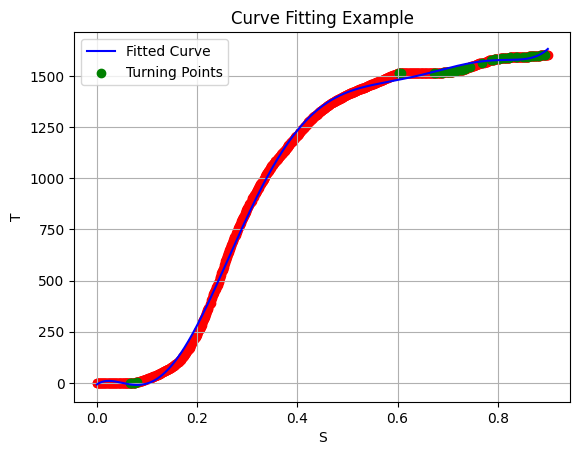

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 6.0, 6.0, 7.0, 9.0, 10.414213562373096, 12.414213562373096, 13.414213562373096, 13.414213562373096, 14.414213562373096, 16.414213562373096, 17.414213562373096, 18.414213562373096, 20.650281539872886, 22.650281539872886, 25.650281539872886, 27.650281539872886, 28.650281539872886, 32.77338716549055, 34.77338716549055, 37.77338716549055, 38.77338716549055, 41.77338716549055, 44.77338716549055, 45.77338716549055, 52.0979424858273, 55.0979424858273, 59.0979424858273, 63.0979424858273, 66.0979424858273, 71.0979424858273, 74.

C:\Users\liuyu\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


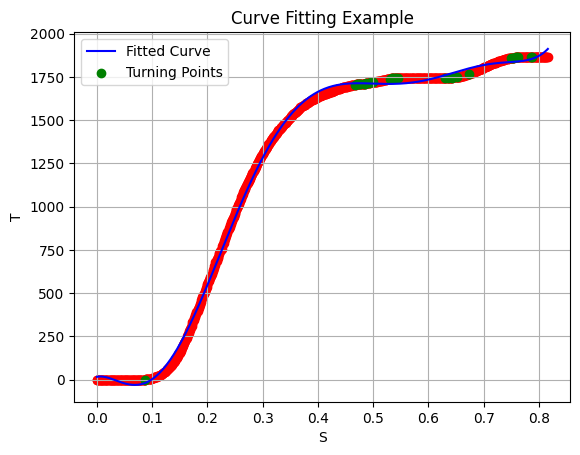

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 8.0, 8.0, 10.0, 11.0, 11.0, 12.0, 14.0, 14.0, 16.0, 18.0, 19.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 29.0, 30.0, 31.0, 33.0, 36.0, 37.0, 38.0, 40.0, 41.0, 45.0, 47.0, 48.0, 51.0, 54.0, 55.0, 58.0, 60.0, 63.0, 66.0, 67.0, 70.0, 76.0, 78.0, 81.16227766016839, 84.16227766016839, 87.16227766016839, 88.16227766016839, 91.16227766016839, 97.16227766016839, 100.16227766016839, 103.16227766016839, 106.16227766

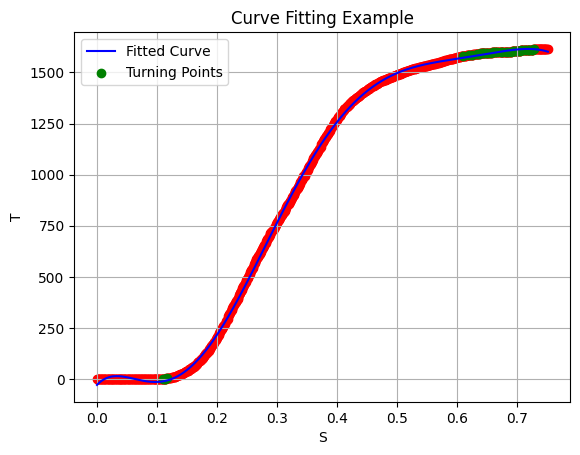

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 9.0, 9.0, 10.0, 10.0, 12.0, 13.0, 13.0, 13.0, 15.23606797749979, 16.23606797749979, 17.23606797749979, 19.23606797749979, 20.23606797749979, 21.23606797749979, 23.23606797749979, 24.23606797749979, 25.23606797749979, 25.23606797749979, 27.23606797749979, 28.23606797749979, 30.23606797749979, 31.23606797749979, 32.236067977499786, 34.236067977499786, 35.236067977499786, 37.47213595499957, 39.47213595499957,

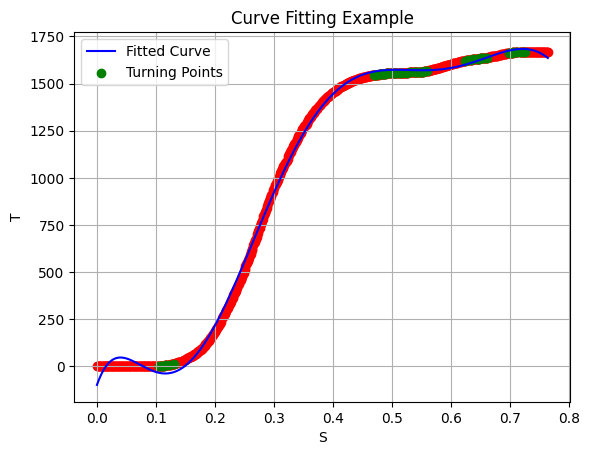

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0, 6.23606797749979, 7.23606797749979, 8.23606797749979, 10.23606797749979, 10.23606797749979, 11.23606797749979, 12.23606797749979, 14.23606797749979, 14.23606797749979, 15.23606797749979, 16.23606797749979, 16.23606797749979, 19.841619252963778, 21.841619252963778, 23.841619252963778, 25.841619252963778, 26.841619252963778, 27.841619252963778, 29.841619252963778, 31.255832815336873, 33.25583281533687, 33.25583281533687, 35.25583281

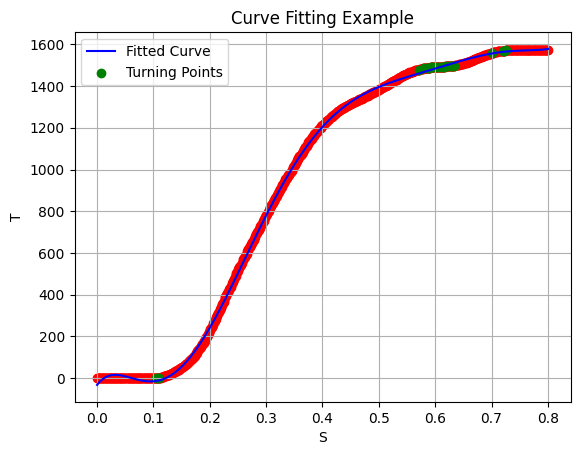

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 6.0, 8.0, 8.0, 9.0, 9.0, 10.0, 12.0, 13.0, 13.0, 14.0, 17.0, 20.0, 21.0, 23.0, 24.414213562373096, 27.414213562373096, 28.414213562373096, 30.414213562373096, 31.414213562373096, 32.41421356237309, 34.41421356237309, 37.41421356237309, 38.41421356237309, 39.41421356237309, 42.41421356237309, 47.41421356237309, 47.41421356237309, 48.41421356237309, 51.41421356237309, 55.88634951737267, 55.88634951737267, 59.88634951737267, 63.88634951737267, 63.88634951737267, 67.886349517372

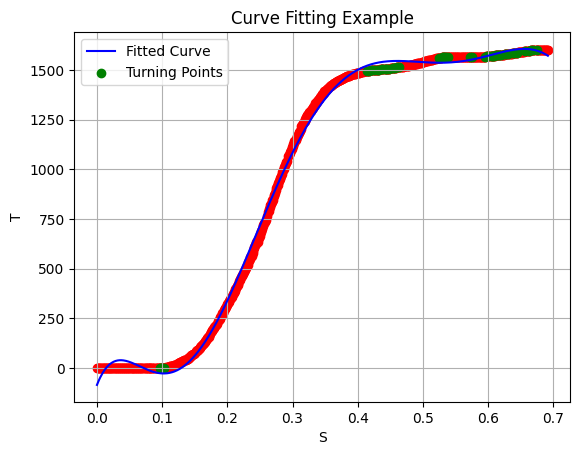

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0, 6.0, 8.23606797749979, 9.23606797749979, 9.23606797749979, 11.23606797749979, 12.23606797749979, 13.23606797749979, 15.23606797749979, 16.23606797749979, 17.650281539872886, 19.650281539872886, 20.650281539872886, 22.650281539872886, 23.650281539872886, 23.650281539872886, 24.650281539872886, 26.650281539872886, 27.650281539872886, 28.650281539872886, 30.650281539872886, 33.650281539872886, 34.650281539872886, 35.650281539872886, 37.88634951737268, 40.88634951737268, 41.88634951737268, 42.88634951737268, 45.88634951737268, 47.88634951737268, 48.886

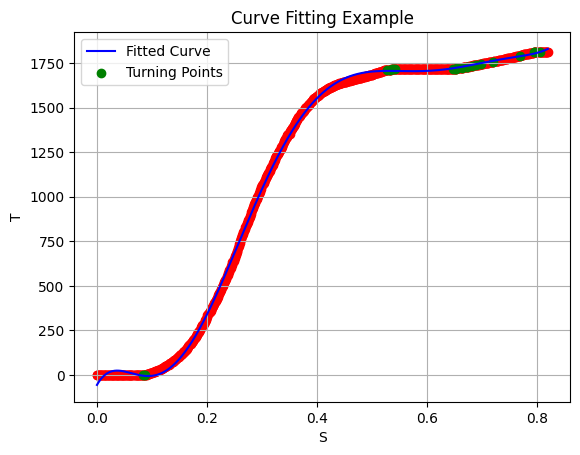

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 6.0, 6.0, 10.0, 11.0, 11.0, 13.0, 14.0, 15.0, 17.0, 18.0, 19.0, 22.0, 24.0, 25.0, 28.0, 31.0, 32.0, 35.0, 36.0, 39.0, 41.0, 43.0, 48.0, 51.0, 52.0, 57.0, 58.0, 61.0, 67.32455532033676, 70.32455532033676, 74.32455532033676, 77.32455532033676, 80.32455532033676, 83.32455532033676, 86.32455532033676, 91.32455532033676, 100.32455532033676, 105.32455532033676, 108.32455532033676, 112.79669127533634, 117.79669127533634, 122.79669127533634, 125.79669127533634, 130.79669127533634, 133.79669127533634, 1

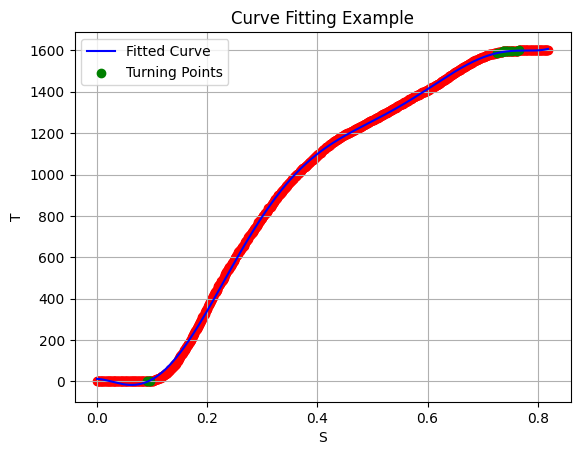

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 8.0, 8.0, 9.0, 9.0, 10.0, 10.0, 10.0, 12.0, 12.0, 13.414213562373096, 13.414213562373096, 13.414213562373096, 15.414213562373096, 15.414213562373096, 16.414213562373096, 16.414213562373096, 17.414213562373096, 19.414213562373096, 21.414213562373096, 21.414213562373096, 22.414213562373096, 22.414213562373096, 23.414213562373096, 23.414213562373096, 23.414213562373096, 25.414213562373096, 25.414213562373096, 26.414213562373096, 27.414213562373096, 27.414213562373096, 29.414213562373096, 29.414213562373096, 30.82842712474619, 30.82842712474619, 32.82842712474619, 33.82842712474619, 33.82842712474619, 34.82842712474619, 36.82842712474619, 37.82842712474619, 37.82842712474619, 38.82842712474619, 40.82842712474619, 41.82842712474619, 42.82842712474619, 44.82842712474619, 45.82842712474619, 47.8

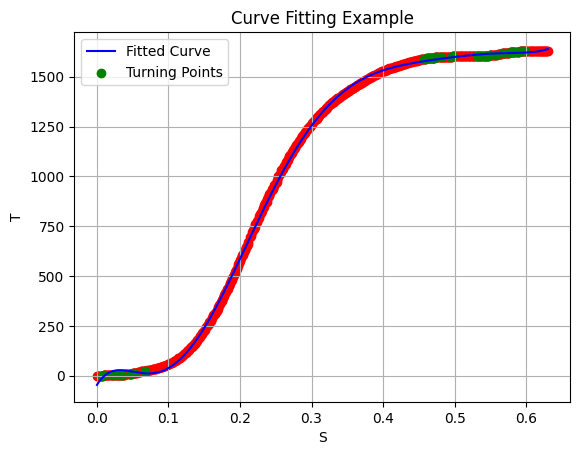

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 4.0, 5.0, 5.0, 6.0, 8.0, 9.0, 10.0, 10.0, 10.0, 13.0, 14.0, 16.0, 17.0, 19.0, 21.0, 23.0, 24.0, 27.0, 28.0, 30.0, 31.0, 34.0, 35.0, 37.0, 40.0, 41.0, 42.0, 45.0, 47.0, 49.0, 52.0, 57.0, 60.0, 60.0, 64.0, 67.0, 70.0, 75.0, 78.0, 81.0, 84.0, 87.0, 90.0, 93.605551275464, 96.605551275464, 99.605551275464, 102.605551275464, 105.605551275464, 109.605551275464, 117.605551275464, 120.605551275464, 123.605551275464, 126.605551275464, 131.605551275464, 134.605551275464, 137.605551275464, 140.605551275464, 145.6055

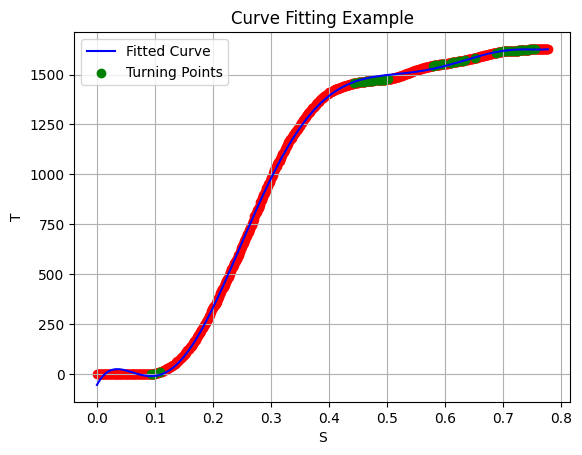

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 7.0, 7.0, 8.0, 9.0, 11.0, 11.0, 12.0, 13.0, 15.0, 16.0, 18.0, 19.0, 20.0, 22.0, 23.414213562373096, 26.414213562373096, 27.414213562373096, 29.414213562373096, 30.414213562373096, 33.41421356237309, 34.41421356237309, 36.41421356237309, 39.41421356237309, 40.41421356237309, 44.41421356237309, 44.41421356237309, 48.41421356237309, 51.41421356237309, 54.41421356237309, 56.41421356237309, 60.01976483783708, 65.01976483783707, 66.01976483783707, 69.01976483783707, 72.01976483783707, 79.09083264970255, 82.09083264970255, 87.090832649

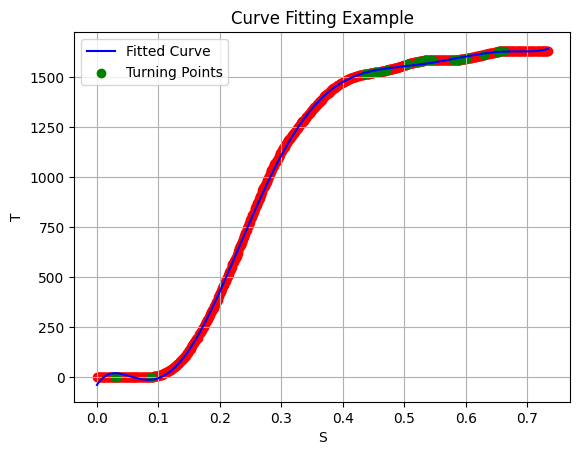

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 6.0, 8.0, 8.0, 9.0, 10.0, 10.0, 12.0, 14.0, 16.0, 17.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27.0, 28.0, 31.0, 33.0, 34.0, 37.0, 38.0, 41.0, 45.0, 47.0, 50.0, 53.0, 54.0, 60.0, 63.0, 64.0, 67.0, 70.0, 73.0, 77.0, 80.0, 83.0, 88.0, 91.0, 96.0, 99.0, 102.0, 107.0, 110.0, 115.0, 124.0, 127.0, 132.0, 137.0, 140.0, 145.0, 150.38516480713452, 156.38516480713452, 161.38516480713452, 164.38516480713452, 169.38516480713452, 174.38516480713452, 179.38516480713452, 186.38516480713452, 191.38516480713452, 195.38516480713452, 200.77032961426903, 210.77032961426903, 215.7703296142690

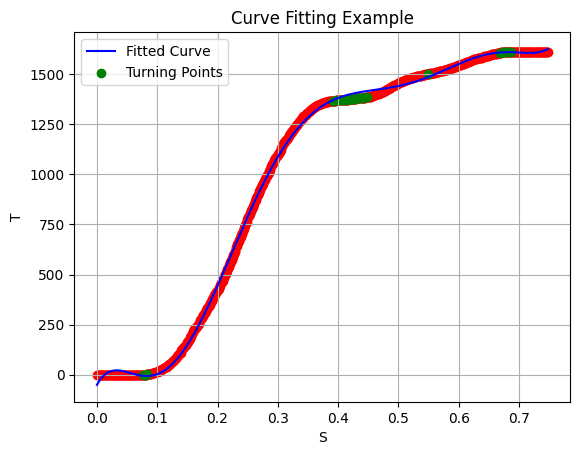

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 3.0, 5.0, 5.0, 6.0, 6.0, 7.0, 9.0, 9.0, 12.0, 14.0, 16.0, 17.0, 18.0, 20.0, 21.0, 24.0, 25.0, 27.0, 28.0, 31.0, 32.0, 35.0, 40.0, 43.0, 44.0, 47.0, 50.0, 53.0, 56.0, 59.0, 62.0, 65.0, 68.0, 71.0, 75.0, 78.0, 81.0, 89.0, 92.0, 95.0, 100.0, 103.0, 103.0, 114.0, 119.0, 122.0, 127.0, 130.0, 135.0, 138.0, 143.0, 146.0, 152.0, 162.0, 167.0, 170.0, 170.0, 175.0, 175.0, 183.0, 188.0, 194.0, 199.0, 204.0, 209.0, 214.0, 219.0, 222.0, 227.0, 233.0, 238.0, 248.0, 253.0, 256.0, 261.0, 266.0, 277.0, 282.0, 287.0, 292.0, 297.0, 302.0, 308.0, 313.0, 318.0, 328.0, 328.0, 338.0, 343.0, 354.

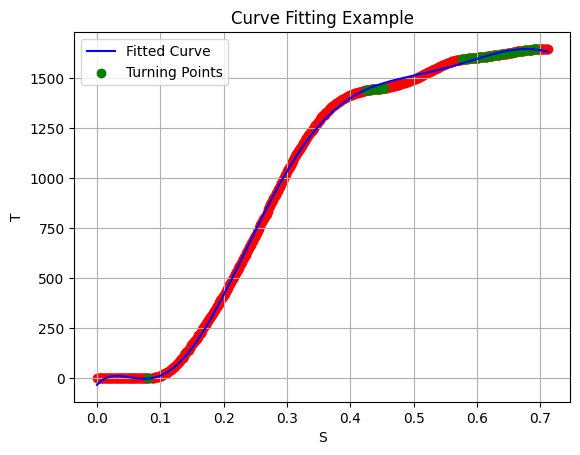

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 7.23606797749979, 9.23606797749979, 10.23606797749979, 10.23606797749979, 11.23606797749979, 11.23606797749979, 13.23606797749979, 14.23606797749979, 15.23606797749979, 17.23606797749979, 18.23606797749979, 20.23606797749979, 21.23606797749979, 22.23606797749979, 24.23606797749979, 25.23606797749979, 28.23606797749979, 29.23606797749979, 32.236067977499786, 33.236067977499786, 35.236067977499786, 36.236067977499786, 37.236067977499786, 40.236067977499786, 42.236067977499786, 43.236067

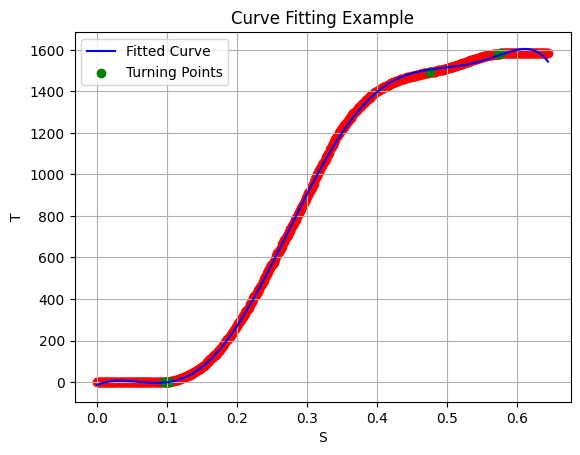

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 4.0, 5.0, 7.0, 8.0, 10.0, 10.0, 11.0, 12.0, 14.0, 15.0, 15.0, 16.0, 18.0, 19.0, 20.0, 23.0, 23.0, 26.0, 29.0, 30.0, 32.0, 34.0, 36.0, 37.0, 41.0, 43.0, 46.0, 47.0, 50.0, 54.0, 57.0, 59.0, 62.0, 65.0, 65.0, 71.0, 74.0, 75.0, 78.0, 81.0, 87.0, 90.0, 93.0, 98.0, 102.0, 105.0, 108.0, 111.0, 116.0, 119.0, 124.0, 127.0, 130.0, 140.0, 146.0, 149.0, 154.38516480713452, 159.38516480713452, 167.38516480713452, 172.38516480713452, 175.38516480713452, 181.38516480713452, 186.38516480713452, 191.38516480713452, 196.38516480713452, 201.38516480713452, 206.38516480713452, 220.3

C:\Users\liuyu\AppData\Local\Temp\ipykernel_18360\4151545738.py:44: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(dS * d2T - dT * d2S) / np.power(dS**2 + dT**2, 1.5)


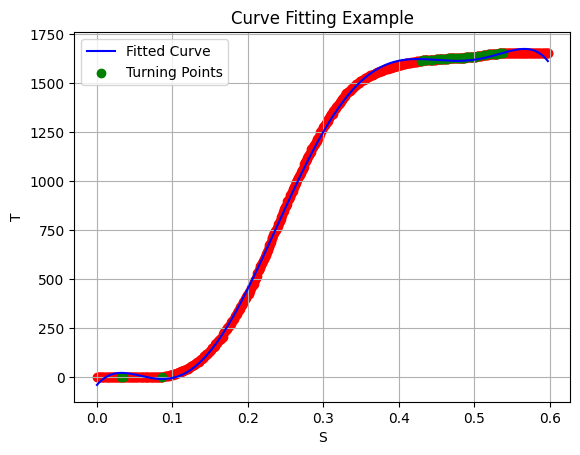

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 6.414213562373095, 6.414213562373095, 7.414213562373095, 7.414213562373095, 9.414213562373096, 9.414213562373096, 9.414213562373096, 10.414213562373096, 11.414213562373096, 11.414213562373096, 11.414213562373096, 13.414213562373096, 13.414213562373096, 14.41421356

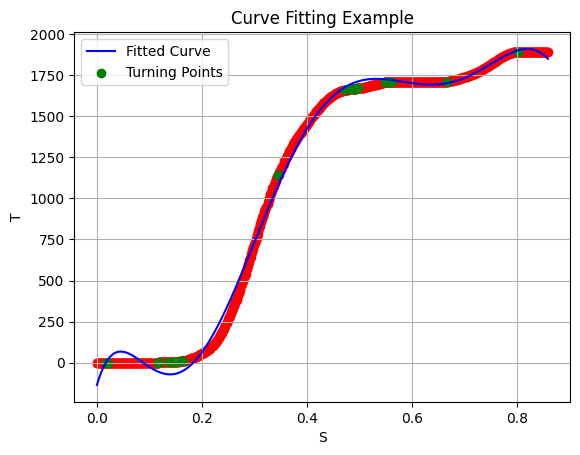

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d,make_interp_spline

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

for i in range(len(Track)):
    #print(track[i])
    S=[]
    T=[]
    s=np.array(Track[i].s.values.tolist())
    t=np.array(Track[i].t.values.tolist())
    for i in range(len(s)):
        S.append(s[i])
        T.append(t[i])
    print(S)
    # 执行样条插值
    #spl = make_interp_spline(T, S)

    # 在指定范围内进行插值
    #T = np.linspace(T.min(), T.max(), 1000)
    #S = spl(T)
    
    # 使用 zip() 函数将两个列表配对并排序
    sorted_pairs = sorted(zip(S, T))

    # 解压排序后的配对，重新组合成两个列表
    T,S = zip(*sorted_pairs)

    # 计算曲率
    dS = np.gradient(S)
    dT = np.gradient(T)
    d2S = np.gradient(dS)
    d2T = np.gradient(dT)
    curvature = np.abs(dS * d2T - dT * d2S) / np.power(dS**2 + dT**2, 1.5)

    # 设置曲率阈值，判断转折点
    threshold = 0.1
    turning_points = np.array(np.where(curvature > threshold)[0])
    
    # 使用最小二乘法进行拟合
    initial_guess = np.zeros(8+8)  # 初始猜测参数
    popt, pcov = curve_fit(polynomial_func, np.array(S), np.array(T), p0=initial_guess)

    # 绘制原始数据和拟合曲线
    
    plt.scatter(S, T, color=colors[0],)
    plt.plot(S, polynomial_func(S, *popt), color=colors[1], label='Fitted Curve')
    plt.scatter(np.array(S)[turning_points], np.array(T)[turning_points], color='green', label='Turning Points')
    plt.xlabel('S')
    plt.ylabel('T')
    plt.title('Curve Fitting Example')
    plt.legend()
    plt.grid(True)
    plt.show()

In [109]:
[1,2,3,4,5,6,7,8,9,10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

最好沿着轨迹绘制图像
因为在轨迹上能够更好地展现速度的变化

In [110]:
import matplotlib.pyplot as plt
for i in range(len(track)):
    #print(track[i])
    v,S,T=get_v_S_T(track[i])
    
    # 定义滑动窗口大小和滤波后的数据容器
    window_size = 3
    smoothed_data = np.zeros_like(v)

    # 应用移动平均滤波
    for i in range(window_size, len(v)-window_size):
        smoothed_data[i] = np.mean(v[i-window_size:i+window_size+1])
    # 绘制图像
    plt.plot(S, smoothed_data, color='red', linewidth=2.0)
    plt.plot(S, v, color='blue', linewidth=1.0,linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sine Function')
    plt.grid(True)
    plt.show()
    

NameError: name 'get_v_S_T' is not defined

In [ ]:
import matplotlib.pyplot as plt

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

t_a=0
for i in range(len(track)):
    #print(track[i])
    v,S,T=get_v_S_T(track[i])
    
    # 定义滑动窗口大小和滤波后的数据容器
    window_size = 3
    smoothed_data = np.zeros_like(v)

    # 应用移动平均滤波
    
    for j in range(window_size, len(v)-window_size):
        smoothed_data[j] = np.mean(v[j-window_size:j+window_size+1])
    # 绘制图像
    plt.plot(T, S, color=colors[i],  linewidth=2.0,linestyle='--')
    plt.axvline(x=T[-1], color=colors[i], linestyle='--')
    plt.xlabel('T')
    plt.ylabel('S')
    plt.title('Sine Function')
    plt.grid(True)
    t_a+=T[-1]
plt.axvline(x=(t_a)/len(track), color='black', linewidth=2.0)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例的含噪声的时序数据
t = np.linspace(0, 10, 1000)
y = np.sin(t) + 0.4 * np.random.randn(1000)

# 定义滑动窗口大小和滤波后的数据容器
window_size = 10
smoothed_data = np.zeros_like(y)

# 应用移动平均滤波
for i in range(window_size, len(y)-window_size):
    smoothed_data[i] = np.mean(y[i-window_size:i+window_size+1])

# 绘制原始数据和滤波后的数据
plt.plot(t, y, label='Noisy Data')
plt.plot(t, smoothed_data, label='Smoothed Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Moving Average Filter')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

S=[]
T=[]
for i in range(len(track)):
    #print(track[i])
    _,s,t=get_v_S_T(track[i])
    S.extend(s)
    T.extend(t)

# 使用 zip() 函数将两个列表配对并排序
sorted_pairs = sorted(zip(T, S))

# 解压排序后的配对，重新组合成两个列表
T, S = zip(*sorted_pairs)


# 使用最小二乘法进行拟合
initial_guess = np.zeros(8+8)  # 初始猜测参数
popt, pcov = curve_fit(polynomial_func, np.array(T), np.array(S), p0=initial_guess)

#print(popt)
#print(pcov)
# 绘制原始数据和拟合曲线
plt.scatter(T, S, color=colors[0],)
plt.plot(T, polynomial_func(T, *popt), color=colors[1], label='Fitted Curve')
plt.xlabel('T')
plt.ylabel('S')
plt.title('Curve Fitting Example')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

S=[]
T=[]
for i in range(len(track)):
    #print(track[i])
    _,s,t=get_v_S_T(track[i])
    S.extend(s)
    T.extend(t)

# 使用 zip() 函数将两个列表配对并排序
sorted_pairs = sorted(zip(S, T))

# 解压排序后的配对，重新组合成两个列表
S,T = zip(*sorted_pairs)


# 使用最小二乘法进行拟合
initial_guess = np.zeros(8+8)  # 初始猜测参数
popt, pcov = curve_fit(polynomial_func, np.array(S), np.array(T), p0=initial_guess)

#print(popt)
#print(pcov)
# 绘制原始数据和拟合曲线
plt.scatter(S, T, color=colors[0],)
plt.plot(S, polynomial_func(S, *popt), color=colors[1], label='Fitted Curve')
plt.xlabel('S')
plt.ylabel('T')
plt.title('Curve Fitting Example')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

for i in range(len(track)):
    #print(track[i])
    _,S,T=get_v_S_T(track[i])


    '''    # 使用 zip() 函数将两个列表配对并排序
    sorted_pairs = sorted(zip(S, T))

    # 解压排序后的配对，重新组合成两个列表
    S,T = zip(*sorted_pairs)'''


    # 使用最小二乘法进行拟合
    initial_guess = np.zeros(8+8)  # 初始猜测参数
    popt, pcov = curve_fit(polynomial_func, np.array(S), np.array(T), p0=initial_guess)

    #print(popt)
    #print(pcov)
    # 绘制原始数据和拟合曲线
    plt.scatter(S, T, color=colors[0],)
    plt.plot(S, polynomial_func(S, *popt), color=colors[1], label='Fitted Curve')
    plt.xlabel('S')
    plt.ylabel('T')
    plt.title('Curve Fitting Example')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 示例轨迹数据
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 计算曲率
dS = np.gradient(x)
dT = np.gradient(y)
d2S = np.gradient(dS)
d2T = np.gradient(dT)
curvature = np.abs(dS * d2T - dT * d2S) / np.power(dS**2 + dT**2, 1.5)

# 设置曲率阈值，判断转折点
threshold = 0.99
turning_points = np.where(curvature > threshold)[0]

# 绘制轨迹和转折点
plt.plot(x, y, label='Trajectory')
plt.scatter(x[turning_points], y[turning_points], color='red', label='Turning Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory with Turning Points')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

for i in range(len(track)):
    #print(track[i])
    _,S,T=get_v_S_T(track[i])


    # 使用 zip() 函数将两个列表配对并排序
    sorted_pairs = sorted(zip(S, T))

    # 解压排序后的配对，重新组合成两个列表
    S,T = zip(*sorted_pairs)

    # 计算曲率
    dS = np.gradient(S)
    dT = np.gradient(T)
    d2S = np.gradient(dS)
    d2T = np.gradient(dT)
    curvature = np.abs(dS * d2T - dT * d2S) / np.power(dS**2 + dT**2, 1.5)

    # 设置曲率阈值，判断转折点
    threshold = 0.9
    turning_points = np.array(np.where(curvature > threshold)[0])
    
    # 使用最小二乘法进行拟合
    initial_guess = np.zeros(8+8)  # 初始猜测参数
    popt, pcov = curve_fit(polynomial_func, np.array(S), np.array(T), p0=initial_guess)

    # 绘制原始数据和拟合曲线
    
    plt.scatter(S, T, color=colors[0],)
    plt.plot(S, polynomial_func(S, *popt), color=colors[1], label='Fitted Curve')
    plt.scatter(np.array(S)[turning_points], np.array(T)[turning_points], color='green', label='Turning Points')
    plt.xlabel('S')
    plt.ylabel('T')
    plt.title('Curve Fitting Example')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',
        'red','blue','green','yellow','pink','purple','orange','gray','brown',]

def polynomial_func(x, *coefficients):
    n = int(len(coefficients)/2)
    result = np.zeros_like(x)
    for i in range(n):
        result += coefficients[i] * np.power(x,i)+coefficients[i+n]
    return result

for i in range(len(track)):
    #print(track[i])
    _,S,T=get_v_S_T(track[i])


    # 使用 zip() 函数将两个列表配对并排序
    sorted_pairs = sorted(zip(S, T))

    # 解压排序后的配对，重新组合成两个列表
    T,S = zip(*sorted_pairs)

    # 计算曲率
    dS = np.gradient(S)
    dT = np.gradient(T)
    d2S = np.gradient(dS)
    d2T = np.gradient(dT)
    curvature = np.abs(dS * d2T - dT * d2S) / np.power(dS**2 + dT**2, 1.5)

    # 设置曲率阈值，判断转折点
    threshold = 0.1
    turning_points = np.array(np.where(curvature > threshold)[0])
    
    # 使用最小二乘法进行拟合
    initial_guess = np.zeros(8+8)  # 初始猜测参数
    popt, pcov = curve_fit(polynomial_func, np.array(S), np.array(T), p0=initial_guess)

    # 绘制原始数据和拟合曲线
    
    plt.scatter(S, T, color=colors[0],)
    plt.plot(S, polynomial_func(S, *popt), color=colors[1], label='Fitted Curve')
    plt.scatter(np.array(S)[turning_points], np.array(T)[turning_points], color='green', label='Turning Points')
    plt.xlabel('S')
    plt.ylabel('T')
    plt.title('Curve Fitting Example')
    plt.legend()
    plt.grid(True)
    plt.show()